# Part I - (Prosper Loan Dataset Analysis)
## by Duke Ta

## Introduction
> Prosper loan dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

>Prosper was founded in 2005 as the first peer-to-peer lending marketplace in the United States. Since then, Prosper has facilitated more than USD 12 billion in loans to more than 770,000 people.
Through Prosper, people can invest in each other in a way that is financially and socially rewarding. Borrowers apply online for a fixed-rate, fixed-term loan between USD 2,000 and USD 40,000. Individuals and institutions can invest in the loans and earn attractive returns. Prosper handles all loan servicing on behalf of the matched borrowers and investors. (source: https://www.prosper.com/about)



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
#Show all columns and rows without being collapse
pd.set_option('display.max_colwidth', None) 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#Hide Warning
warnings.filterwarnings("ignore", category=FutureWarning)

# set base color for plots
base_color = sns.color_palette()[0]

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
df_all = pd.read_csv('prosperLoanData.csv')
df_all.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [3]:
df_all[df_all['ListingKey']=='0A0635972629771021E38F3'].head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
998,0A0635972629771021E38F3,1055932,2013-12-18 14:25:17.053000000,NaN,60,Current,NaN,0.1771,0.1535,0.1435,0.13507,0.0599,0.07517,5.0,B,6.0,1,MD,Other,Employed,100.0,True,False,NaN,2014-02-08 11:39:13,760.0,779.0,1994-11-01 00:00:00,16.0,16.0,34.0,15,623.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,8028.0,0.27,14190.0,32.0,0.96,1.0,0.35,"$25,000-49,999",True,3750.0,CB643706582969191E8C26B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1,132043,10000,2014-02-12 00:00:00,Q1 2014,98A937006186534818378B9,239.74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
999,0A0635972629771021E38F3,1055932,2013-12-18 14:25:17.053000000,NaN,60,Current,NaN,0.1771,0.1535,0.1435,0.13507,0.0599,0.07517,5.0,B,7.0,1,MD,Other,Employed,100.0,True,False,NaN,2014-02-08 11:39:13,760.0,779.0,1994-11-01 00:00:00,16.0,16.0,34.0,15,623.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,8028.0,0.27,14190.0,32.0,0.96,1.0,0.35,"$25,000-49,999",True,3750.0,CB643706582969191E8C26B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1,132043,10000,2014-02-12 00:00:00,Q1 2014,98A937006186534818378B9,239.74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
57494,0A0635972629771021E38F3,1055932,2013-12-18 14:25:17.053000000,NaN,60,Current,NaN,0.1771,0.1535,0.1435,0.13507,0.0599,0.07517,5.0,B,8.0,1,MD,Other,Employed,100.0,True,False,NaN,2014-02-08 11:39:13,760.0,779.0,1994-11-01 00:00:00,16.0,16.0,34.0,15,623.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,8028.0,0.27,14190.0,32.0,0.96,1.0,0.35,"$25,000-49,999",True,3750.0,CB643706582969191E8C26B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1,132043,10000,2014-02-12 00:00:00,Q1 2014,98A937006186534818378B9,239.74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [4]:
#Since ListingKey is the unique identity for each loan, duplicated ListingKey means duplicated value so i'll drop them
df_all=df_all.drop_duplicates(subset='ListingKey')

In [5]:
df_all.LoanStatus.value_counts()

Current                   55730
Completed                 38061
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        800
Past Due (31-60 days)       361
Past Due (61-90 days)       311
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      203
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [6]:
#I'll drop Loan that had been cancelled, this wont affect our dataset
df_all=df_all.drop(df_all[df_all['LoanStatus'] == 'Cancelled'].index)

In [7]:
#overview of data shape and composition
print(df_all.shape)
print(df_all.dtypes)

(113061, 81)
ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64


### What is the structure of your dataset?

> The dataset have over 100000 records and  81 columns. These columns can't be all used to answer certain questions of interest, so i'll only keep columns that will contribute to further analysis 

In [8]:
# drop unnecessary columns for our analysis
df = df_all[['ListingKey','Term','LoanOriginationDate','LoanStatus','ClosedDate',
            'BorrowerRate','CreditGrade','ProsperRating (Alpha)', 'StatedMonthlyIncome','EmploymentStatus'
            ,'IncomeRange','IncomeVerifiable', 'LoanOriginalAmount' , 'Recommendations',
            'Investors','IsBorrowerHomeowner']]
df.head(10)

,ListingKey,Term,LoanOriginationDate,LoanStatus,ClosedDate,BorrowerRate,CreditGrade,ProsperRating (Alpha),StatedMonthlyIncome,EmploymentStatus,IncomeRange,IncomeVerifiable,LoanOriginalAmount,Recommendations,Investors,IsBorrowerHomeowner
0,1021339766868145413AB3B,36,2007-09-12 00:00:00,Completed,2009-08-14 00:00:00,0.1580,C,NaN,3083.333333,Self-employed,"$25,000-49,999",True,9425,0,258,True
1,10273602499503308B223C1,36,2014-03-03 00:00:00,Current,NaN,0.0920,NaN,A,6125.000000,Employed,"$50,000-74,999",True,10000,0,1,False
2,0EE9337825851032864889A,36,2007-01-17 00:00:00,Completed,2009-12-17 00:00:00,0.2750,HR,NaN,2083.333333,Not available,Not displayed,True,3001,0,41,False
3,0EF5356002482715299901A,36,2012-11-01 00:00:00,Current,NaN,0.0974,NaN,A,2875.000000,Employed,"$25,000-49,999",True,10000,0,158,True
4,0F023589499656230C5E3E2,36,2013-09-20 00:00:00,Current,NaN,0.2085,NaN,D,9583.333333,Employed,"$100,000+",True,15000,0,20,True
5,0F05359734824199381F61D,60,2013-12-24 00:00:00,Current,NaN,0.1314,NaN,B,8333.333333,Employed,"$100,000+",True,15000,0,1,True
6,0F0A3576754255009D63151,36,2013-04-18 00:00:00,Current,NaN,0.2712,NaN,E,2083.333333,Employed,"$25,000-49,999",True,3000,0,1,False
7,0F1035772717087366F9EA7,36,2013-05-13 00:00:00,Current,NaN,0.2019,NaN,C,3355.750000,Employed,"$25,000-49,999",True,10000,0,1,False
8,0F043596202561788EA13D5,36,2013-12-12 00:00:00,Current,NaN,0.0629,NaN,AA,3333.333333,Employed,"$25,000-49,999",True,10000,0,1,True
10,0F123545674891886D9F106,60,2012-05-17 00:00:00,Current,NaN,0.2489,NaN,C,7500.000000,Employed,"$75,000-99,999",True,13500,0,19,False



### What is/are the main feature(s) of interest in your dataset?

> The analysis will focus on main characteristic of the loan including the amount, interest rate, rating and the status of the borrower. And if possible, the analysis will try to answer questions relate to loan default,

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Since the dataset provide informations about the exact data of the loan, listing date, and many associated feature like loan amount, borrower employment status and income. It would help during the analysis process

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


In [9]:
df.head()

,ListingKey,Term,LoanOriginationDate,LoanStatus,ClosedDate,BorrowerRate,CreditGrade,ProsperRating (Alpha),StatedMonthlyIncome,EmploymentStatus,IncomeRange,IncomeVerifiable,LoanOriginalAmount,Recommendations,Investors,IsBorrowerHomeowner
0,1021339766868145413AB3B,36,2007-09-12 00:00:00,Completed,2009-08-14 00:00:00,0.1580,C,NaN,3083.333333,Self-employed,"$25,000-49,999",True,9425,0,258,True
1,10273602499503308B223C1,36,2014-03-03 00:00:00,Current,NaN,0.0920,NaN,A,6125.000000,Employed,"$50,000-74,999",True,10000,0,1,False
2,0EE9337825851032864889A,36,2007-01-17 00:00:00,Completed,2009-12-17 00:00:00,0.2750,HR,NaN,2083.333333,Not available,Not displayed,True,3001,0,41,False
3,0EF5356002482715299901A,36,2012-11-01 00:00:00,Current,NaN,0.0974,NaN,A,2875.000000,Employed,"$25,000-49,999",True,10000,0,158,True
4,0F023589499656230C5E3E2,36,2013-09-20 00:00:00,Current,NaN,0.2085,NaN,D,9583.333333,Employed,"$100,000+",True,15000,0,20,True


In [10]:
df.shape

(113061, 16)

In [11]:
#check if there is any loans that has closed date prior to loan date
df[df['LoanOriginationDate']> df['ClosedDate']]

,ListingKey,Term,LoanOriginationDate,LoanStatus,ClosedDate,BorrowerRate,CreditGrade,ProsperRating (Alpha),StatedMonthlyIncome,EmploymentStatus,IncomeRange,IncomeVerifiable,LoanOriginalAmount,Recommendations,Investors,IsBorrowerHomeowner
108297,DEAA359893047281162F432,36,2013-12-31 00:00:00,Defaulted,2010-03-16 00:00:00,0.1139,NaN,A,6250.0,Self-employed,"$75,000-99,999",False,2500,0,1,False


In [12]:
pd.set_option('chained_assignment', None) # hide warning
#delete these false data
df.drop(df[df['LoanOriginationDate'] > df['ClosedDate']].index, inplace=True)

### LoanOriginationDate

In [13]:
#We dont need the hour details so we'll convert the datatype into datetime
df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'])
# The same goes for closed date
df['ClosedDate'] = pd.to_datetime(df['ClosedDate'])

In [14]:
#span of the loans
(df.LoanOriginationDate.min(), df.LoanOriginationDate.max())

(Timestamp('2005-11-15 00:00:00'), Timestamp('2014-03-12 00:00:00'))

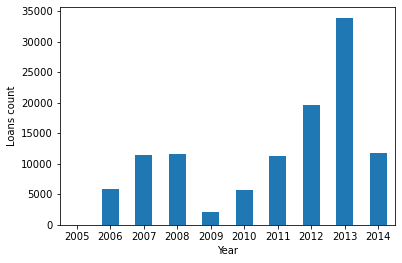

In [15]:
#Groupby year and ploting bar chart
df.groupby(df.LoanOriginationDate.dt.year).count()['LoanOriginationDate'].plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Loans count')
plt.xticks(rotation=0);

> The loans decrease sharply in 2009, This might be a references to the global crisis where economic activities are limited and people dont want to borrow money to do business. For 2014, we only have data up to 12th of march

### Loan Status

In [16]:
df.LoanStatus.value_counts()

Current                   55730
Completed                 38061
Chargedoff                11992
Defaulted                  5017
Past Due (1-15 days)        800
Past Due (31-60 days)       361
Past Due (61-90 days)       311
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      203
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

"Completed->Current->Past Due (1-15 days)->Past Due (16-30 days)->Past Due (31-60 days)->Past Due (61-90 days)->Past Due (91-120 days)->Past Due (>120 days)->Defaulted->Chargedoff."

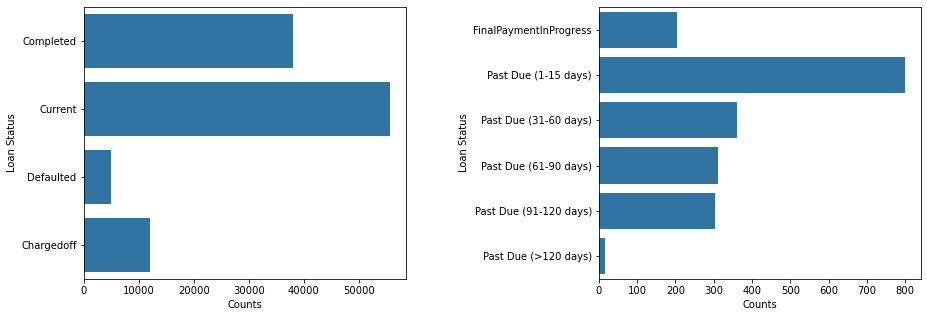

In [17]:
Loan_Status = {
    'Category': ['Completed', 'Current', 'FinalPaymentInProgress', 'Past Due (1-15 days)',
                 'Past Due (31-60 days)', 'Past Due (61-90 days)',
                 'Past Due (91-120 days)', 'Past Due (>120 days)', 'Defaulted', 'Chargedoff']
}
# Convert LoanStatus column to ordered categorical variable
df['LoanStatus'] = df['LoanStatus'].astype(pd.api.types.CategoricalDtype(
    ordered=True, categories=Loan_Status['Category']))

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
# Filter DataFrame for values that have counts >= 1000
upper_order=['Completed', 'Current', 'Defaulted', 'Chargedoff']
Loan_Status_count_greater = df['LoanStatus'].value_counts()
Loan_Status_count_greater = Loan_Status_count_greater[Loan_Status_count_greater >= 1000]
sns.countplot(data=df[df['LoanStatus'].isin(Loan_Status_count_greater.index)],
              y='LoanStatus', order=upper_order, color=base_color)
plt.xlabel('Counts')
plt.ylabel('Loan Status')

plt.subplot(1, 2, 2)
# Filter DataFrame for values that have counts < 1000
lower_order=['FinalPaymentInProgress', 'Past Due (1-15 days)','Past Due (31-60 days)', 'Past Due (61-90 days)',
                 'Past Due (91-120 days)', 'Past Due (>120 days)']
Loan_Status_count_less = df['LoanStatus'].value_counts()
Loan_Status_count_less = Loan_Status_count_less[Loan_Status_count_less < 1000]
sns.countplot(data=df[df['LoanStatus'].isin(Loan_Status_count_less.index)],
              y='LoanStatus', order=lower_order, color=base_color)
plt.xlabel('Counts')
plt.ylabel('Loan Status')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.6)

plt.show()

In [18]:
(len(df[df.LoanStatus == 'Chargedoff']) + len(df[df.LoanStatus == 'Defaulted']))/ len(df[df.LoanStatus != 'Current'])

0.296685853828711

> Most of the loans are currently active, the amount of loans that have issues (defaulted, chargeoff) is quite significant compare to the amount of loans that had been paid. in the categories of load that past the due, only a little proportion are >120 days, most of them are within 15 days (nearly 800), and the categories for 1 to 4 months past due receive similar in values, about 300 each

Here i want to create a nother column to show the state of the loan, it will be categorize into less values to describe if the loan has issue (past due, defaulted or chargeoff) or completed or currently being paid. This will benefit our visualization in later stages

In [19]:
mapping = {'Completed': 'Completed', 'Current': 'Current', 'FinalPaymentInProgress' :'Current',
          'Defaulted': 'Fault', 'Chargedoff':'Fault'}
df['LoanType'] = df['LoanStatus'].map(mapping).fillna('Past Due')
Loan_Type = {'Category': ['Completed','Current','Past Due','Fault']}
df.LoanType = df['LoanType'].astype(pd.api.types.CategoricalDtype(ordered=True, categories = Loan_Type['Category']))

In [20]:
df.LoanType.value_counts()

Current      55933
Completed    38061
Fault        17009
Past Due      2057
Name: LoanType, dtype: int64

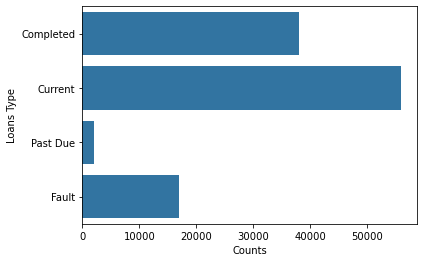

In [21]:
sns.countplot(data = df, y = 'LoanType', color = base_color)
plt.xlabel('Counts')
plt.ylabel('Loans Type');

### ClosedDate

In [22]:
#57990 loans are not closed
df.ClosedDate.isna().sum()

57990

In [23]:
#Span of closed date 
(df.ClosedDate.min(),df.ClosedDate.max())

(Timestamp('2005-11-25 00:00:00'), Timestamp('2014-03-10 00:00:00'))

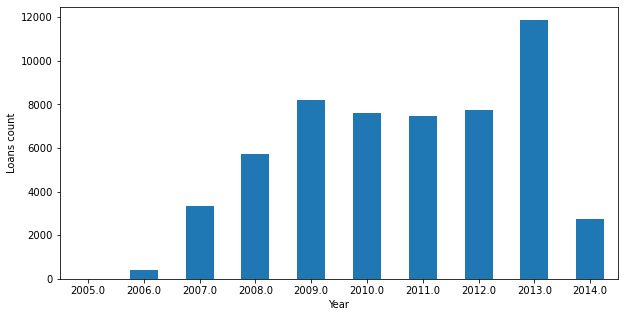

In [24]:
plt.figure(figsize=(10,5))
#Groupby year and ploting bar chart
df.groupby(df.ClosedDate.dt.year).count()['ClosedDate'].plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Loans count')
plt.xticks(rotation=0);

> It can be seens that as the loans increase every year, the ones that being closed also increase. The amount in 2014 is also due to the limit of the data, while in 2009, issued loans decrease, the amount is still stable as it include the one that was made in earlier years.

In [25]:
# Check the distribution of months needed to close a loan
# Create a columns that record the span
df['LoanSpan'] = ((df.ClosedDate - df.LoanOriginationDate) / np.timedelta64(1, 'M'))

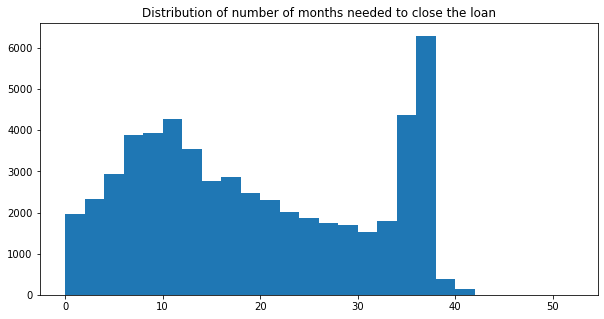

In [26]:
plt.figure(figsize=(10,5))
# plot the distribution
bins = np.arange(0, df['LoanSpan'].max()+2, 2)
plt.hist(data = df, x = 'LoanSpan', bins = bins)
plt.title('Distribution of number of months needed to close the loan');

> while the distribution have a bell shape in smaller values and peak around 10, a significant amount of loans needed nearly 40 months to complete

### Term


In [27]:
df.Term.value_counts()

36    87218
60    24228
12     1614
Name: Term, dtype: int64

''

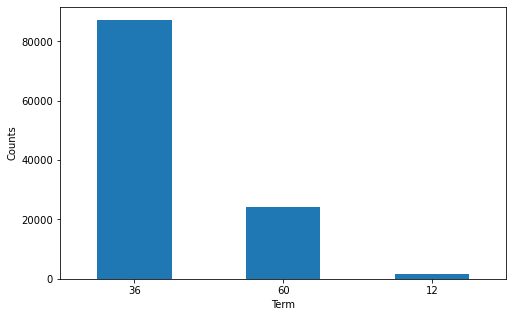

In [28]:
plt.figure(figsize=(8,5))
df.Term.value_counts().plot(kind='bar', rot = 0)
plt.xlabel('Term')
plt.ylabel('Counts')
;

> Most of the Loans are 36 Months period, short-term 12 months loans only account for a small proportion
### LoanOriginalAmount

In [29]:
(df.LoanOriginalAmount.min(),df.LoanOriginalAmount.max())

(1000, 35000)

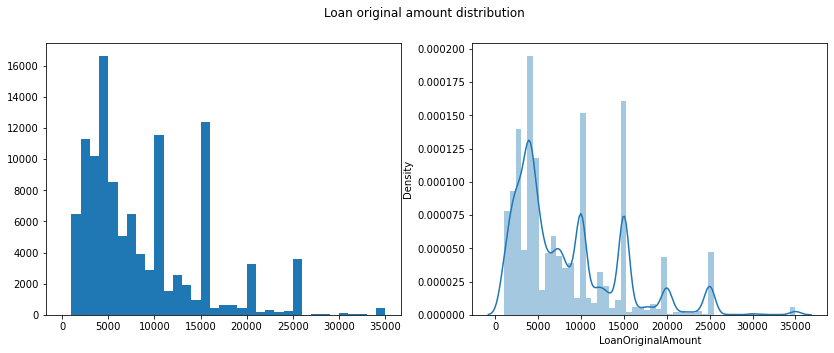

In [30]:
plt.figure(figsize=(14,5))
plt.suptitle('Loan original amount distribution')
plt.subplot(1,2,1)
bins = np.arange(0, df['LoanOriginalAmount'].max()+1000, 1000)
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bins)

plt.subplot(1,2,2)
sns.distplot(df['LoanOriginalAmount']);


In [31]:
df.LoanOriginalAmount.value_counts().nlargest(15)

4000     14207
15000    12232
10000    10956
5000      6953
2000      6042
3000      5727
25000     3588
20000     3234
1000      3203
2500      2988
7500      2967
7000      2930
6000      2857
3500      2562
8000      2424
Name: LoanOriginalAmount, dtype: int64

>The most frequent value for loan is 4000. From the historgram, for higher value loans there are rarely odd values, they most ly be 10000, 15000, 20000, 25000

### IncomeRange

In [32]:
df.IncomeRange.value_counts()

$25,000-49,999    31939
$50,000-74,999    30749
$100,000+         17188
$75,000-99,999    16779
Not displayed      7737
$1-24,999          7241
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

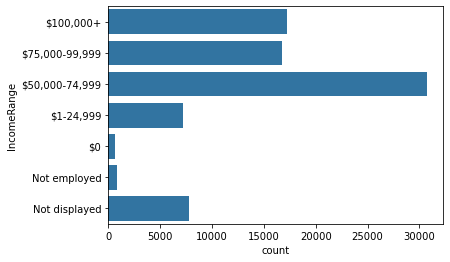

In [33]:
#making income range ordinal categorical value to check the distribution
income_range = {'Category': ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$1-24,999', '$0', 'Not employed', 'Not displayed']}
df.IncomeRange = df['IncomeRange'].astype(pd.api.types.CategoricalDtype(ordered=True, categories = income_range['Category']))
sns.countplot(data = df, y = 'IncomeRange', color = base_color)
plt.xticks(rotation = 0);

> From the bar chart, a typical borrower would have an income from 50000-75000, the proportion for 75000-99999 and 100000+ are quite significant while unemployed and no income people have a small tendency to list a loan.
### StatedMonthlyIncome

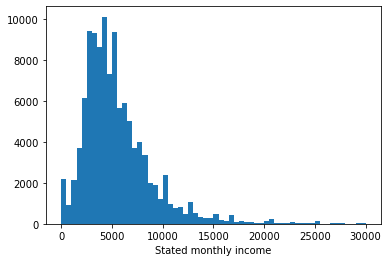

In [34]:
bins = np.arange(0, 30500, 500)
plt.hist(data = df, x = 'StatedMonthlyIncome', bins = bins)
plt.xlabel('Stated monthly income');

>The distribution have a long tail and is right skewed so i'll try to log scaling it

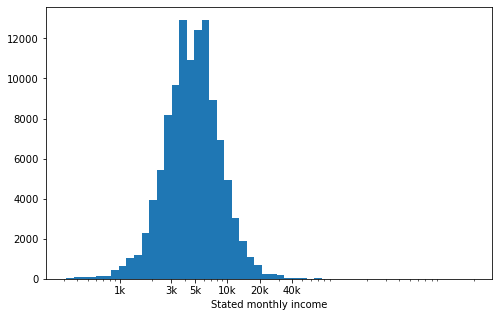

In [35]:
# Log scaling
log_binsize = 0.07
bins = 10 ** np.arange(2.5, np.log10(df['StatedMonthlyIncome'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'StatedMonthlyIncome', bins = bins)
plt.xscale('log')
plt.xticks([1000, 3000, 5000, 10000, 20000, 40000], ['1k', '3k', '5k', '10k', '20k', '40k'])
plt.xlabel('Stated monthly income')
plt.show()

>Given the very skewed distribution of stated monthly income, we transformed the scale. The distribution looks normal after the transformation.

### CreditGrade and ProsperRating
I mentioned this 2 columns at the same time because they are both use to rate the credit, they might have different criteria but the rating level is the same. one applied for loans prior to 2009 while the other is for the latter period. So i'll try to merge them into 1 credit column

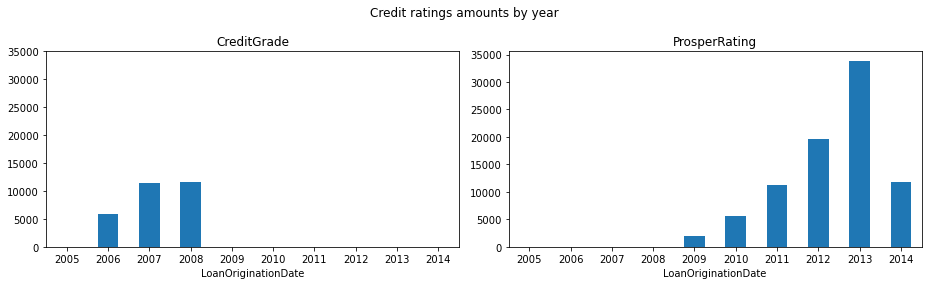

In [36]:
#Ploting 2 rating system based on year
plt.figure(figsize=(13,4))
plt.suptitle("Credit ratings amounts by year")
#creating plot for CreditGrade
plt.subplot(1,2,1)
df.groupby(df.LoanOriginationDate.dt.year).count()['CreditGrade'].plot(kind='bar')
plt.title('CreditGrade')
plt.xticks(rotation = 0)
plt.ylim(0, 35000) 
#creating subplot for ProsperRating
plt.subplot(1,2,2)
df.groupby(df.LoanOriginationDate.dt.year).count()['ProsperRating (Alpha)'].plot(kind='bar')
plt.title('ProsperRating')
plt.xticks(rotation = 0)
plt.tight_layout();

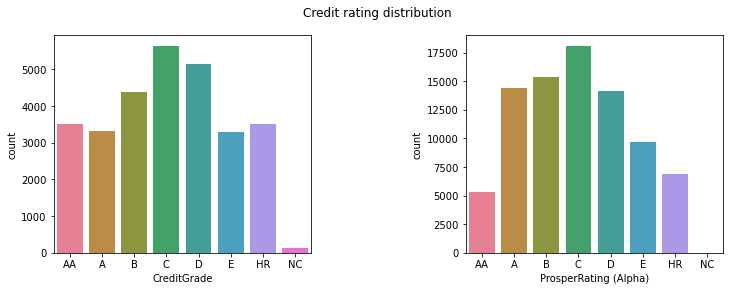

In [37]:
credit_rating = {'Category': ['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC']}
df['CreditGrade'] = df['CreditGrade'].astype(pd.api.types.CategoricalDtype(ordered=True, categories = credit_rating['Category']))
df['ProsperRating (Alpha)'] = df['ProsperRating (Alpha)'].astype(pd.api.types.CategoricalDtype(ordered=True, categories = credit_rating['Category']))
#creating plot for CreditGrade
plt.figure(figsize=(12,4))
plt.suptitle("Credit rating distribution")
plt.subplot(1,2,1)
sns.countplot(data = df, x = 'CreditGrade', palette = 'husl')
#creating subplot for ProsperRating
plt.subplot(1,2,2)
sns.countplot(data = df, x = 'ProsperRating (Alpha)', palette = 'husl')
# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.6)

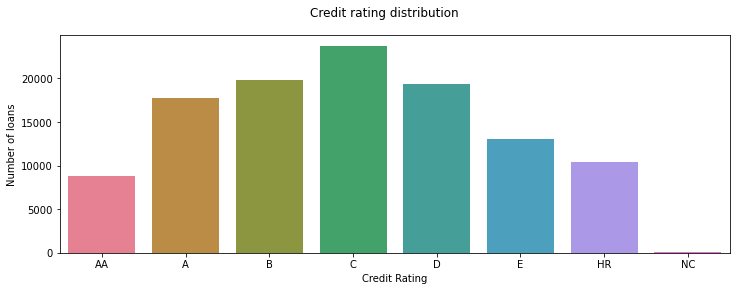

In [38]:
#Merging 2 columns into a new one.
df['CreditRating'] = np.where(df.CreditGrade.isnull(), df['ProsperRating (Alpha)'], df.CreditGrade)
#Making the column ordinal catergorial variable to see the distribution
df.CreditRating = df['CreditRating'].astype(pd.api.types.CategoricalDtype(ordered=True, categories = credit_rating['Category']))
#ploting the distribution
plt.figure(figsize=(12,4))
plt.suptitle("Credit rating distribution")
sns.countplot(data = df, x = 'CreditRating', palette = 'husl')
plt.xlabel('Credit Rating')
plt.ylabel('Number of loans');

In [39]:
# drop 2 columns
df = df.drop(['CreditGrade', 'ProsperRating (Alpha)'], axis=1)

> The distribution of loans rating seems to follow a normal distribution, where C rating loans are the most frequent
### IncomeVerifiable


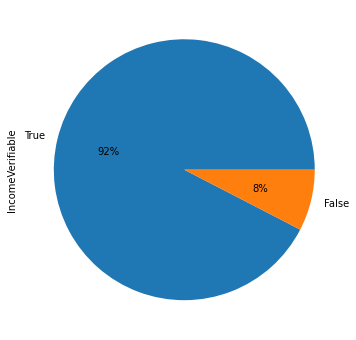

In [40]:
plt.figure(figsize=(6, 6))
df.IncomeVerifiable.value_counts().plot(kind='pie', autopct='%1.0f%%');

> 92% of the borrower's income are verified. We will try to focus on this when checking default rate later

### EmploymentStatus

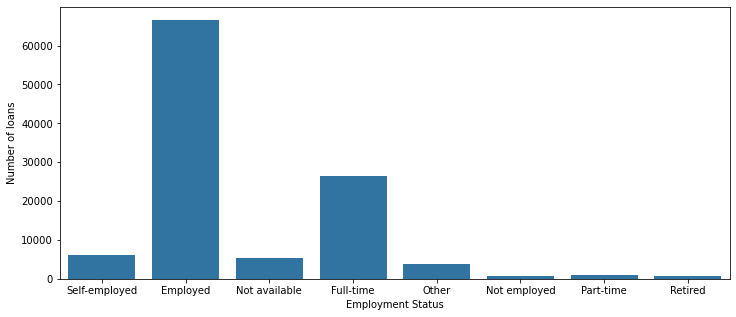

In [41]:
plt.figure(figsize=[12, 5])
g = sns.countplot(data = df, x = 'EmploymentStatus', color = base_color)
plt.xticks(rotation = 0)
plt.xlabel('Employment Status')
plt.ylabel('Number of loans');

In [42]:
Employment_value_counts = df['EmploymentStatus'].value_counts()
Employment_value_counts_value_counts_percentage = Employment_value_counts / Employment_value_counts.sum() * 100
Employment_value_counts_value_counts_percentage

Employed         60.102159
Full-time        23.782579
Self-employed     5.460797
Not available     4.824561
Other             3.377012
Part-time         0.981879
Not employed      0.753556
Retired           0.717457
Name: EmploymentStatus, dtype: float64

>60% of the borrower are Employed, while 24% are fulltime, this make up for most of the proportion
### Investors

In [43]:
df.Investors.value_counts()

1       27178
2        1375
3         979
4         822
5         750
8         749
10        724
6         720
9         719
11        717
34        699
13        699
33        695
7         694
27        683
37        681
25        673
29        669
26        667
31        663
21        662
24        660
14        659
35        659
17        655
39        652
30        650
19        649
38        647
23        644
12        640
28        636
22        636
32        636
44        635
16        635
36        632
42        622
40        611
41        608
15        608
45        604
48        604
43        583
55        580
20        577
18        571
47        569
46        563
54        555
50        543
49        541
58        541
51        541
52        540
53        521
57        512
56        497
62        489
59        487
64        485
60        483
65        481
73        477
61        467
70        441
66        441
63        440
72        433
74        431
68        425
69    

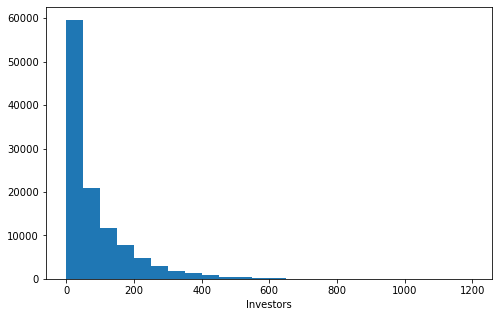

In [44]:
binsize = 50
bins = np.arange(0, df['Investors'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'Investors', bins = bins)
plt.xlabel('Investors')
plt.show()

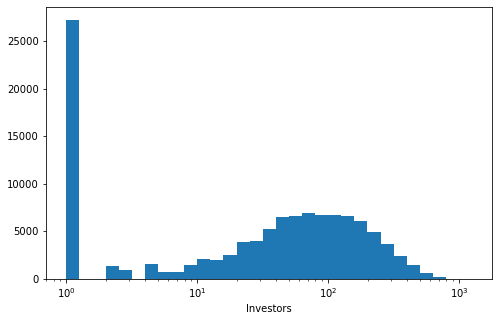

In [45]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(df['Investors'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'Investors', bins = bins)
plt.xscale('log')
plt.xlabel('Investors')
plt.show()

> After log scaling, the distribution looks similar to a normal distribution, however, since the amount of value with only 1 investor account for the majority, there is still a spike at 10^0.

### Recommendations

In [46]:
df.Recommendations.value_counts()

0     108803
1       3514
2        568
3        108
4         26
5         14
9          6
7          5
6          4
8          3
18         2
16         2
14         1
21         1
24         1
19         1
39         1
Name: Recommendations, dtype: int64

> The majority of the loans have 0 recommendations while a proportion of them have 1 to 3. only a tiny amount have more then 10 recommendations

In [47]:
df[df['Recommendations']>10]

,ListingKey,Term,LoanOriginationDate,LoanStatus,ClosedDate,BorrowerRate,StatedMonthlyIncome,EmploymentStatus,IncomeRange,IncomeVerifiable,LoanOriginalAmount,Recommendations,Investors,IsBorrowerHomeowner,LoanType,LoanSpan,CreditRating
8060,01F03433451795526F41763,36,2008-10-09,Chargedoff,2010-03-10,0.3500,4166.666667,Self-employed,"$50,000-74,999",False,3500,16,34,True,Fault,16.985975,C
14716,9A8434160319414122B8E0C,36,2008-04-09,Completed,2011-02-07,0.0500,0.000000,Full-time,$0,False,25000,39,90,False,Completed,33.971950,AA
15545,D4463388295350470A50968,36,2007-05-16,Completed,2010-03-16,0.0780,6206.750000,Full-time,"$50,000-74,999",True,25000,21,226,True,Completed,34.004805,AA
17717,D05234067009139905384E0,36,2007-12-04,Completed,2010-11-10,0.0650,7047.666667,Full-time,"$75,000-99,999",True,10000,16,226,True,Completed,35.220436,AA
50340,58E13410981598681A5DF60,36,2008-02-07,Completed,2010-01-15,0.0900,18750.000000,Full-time,"$100,000+",True,24000,14,567,True,Completed,23.261258,AA
80738,8EFA33871110079125F08B8,36,2007-04-25,Completed,2009-08-19,0.1055,19232.750000,Full-time,"$100,000+",True,25000,24,430,True,Completed,27.828087,AA
94485,58C735794066416541F59CC,36,2013-05-23,Current,NaT,0.0699,11899.250000,Employed,"$100,000+",True,2000,19,26,True,Current,NaN,AA
106650,134B3551389990286A6BCC0,12,2012-06-25,Completed,2012-10-26,0.0565,11899.250000,Employed,"$100,000+",True,2000,18,56,True,Completed,4.041151,AA
111736,7DEA35299196277169A7FCE,12,2011-10-26,Completed,2012-03-20,0.0929,11899.250000,Employed,"$100,000+",True,2860,18,32,True,Completed,4.796813,A


> It seems like the loan with high recommendations doesn't really stand out

### BorrowerRate

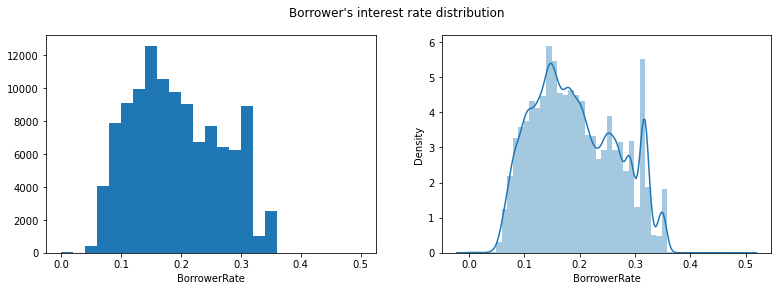

In [48]:
plt.figure(figsize=(13,4))
plt.suptitle("Borrower's interest rate distribution")
plt.subplot(1,2,1)
bins = np.arange(0, df.BorrowerRate.max()+0.02, 0.02)
plt.hist(data = df, x = 'BorrowerRate', bins = bins)
plt.xlabel('BorrowerRate')
plt.subplot(1,2,2)
sns.distplot(df['BorrowerRate']);

In [49]:
df['BorrowerRate'].value_counts().nlargest(10)

0.3177    3672
0.3500    1905
0.3199    1651
0.2900    1508
0.2699    1314
0.1500    1174
0.1400    1022
0.1099     928
0.2000     906
0.1800     791
Name: BorrowerRate, dtype: int64

> It seems like the high rate loans are the most popular, while looking at the distributions, the lower rate counts is also significant. we'll try to look at this variable with correlations to others in below sections

### IsBorrowerHomeowner

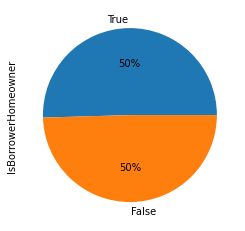

In [50]:
df.IsBorrowerHomeowner.value_counts().plot(kind='pie', autopct='%1.0f%%');

>Half of the borrowers are homeowner

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
- The number of loans made have a rising trend but it experienced a sharp decrease when the economics is in regression
- The loans's value seem to receive less odd value as it get bigger
- The distribution for loan's investors has a long tail in distribution so i made it a log scale.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
- I made 2 ordinal categories for rating and income range to see if it follow a normal distribution and has its values focus on the average points
- I created an extra columns for loans period, it has a bell shape for short to medium term loans and spike up as the period approach 40
- I had merge 2 rating column into one as they represent different period. The rating of the loans follow a normal distribution in term of ordinal categorical variable. I also remove the 2 columns that used for the merging

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [51]:
numeric_vars = ['BorrowerRate', 'LoanOriginalAmount','StatedMonthlyIncome'
                ,'LoanSpan', 'Term','Investors','Recommendations']
bool_vars = ['IncomeVerifiable','IsBorrowerHomeowner']
ordered_categoric_vars = ['IncomeRange', 'CreditRating']

### Numeric variables

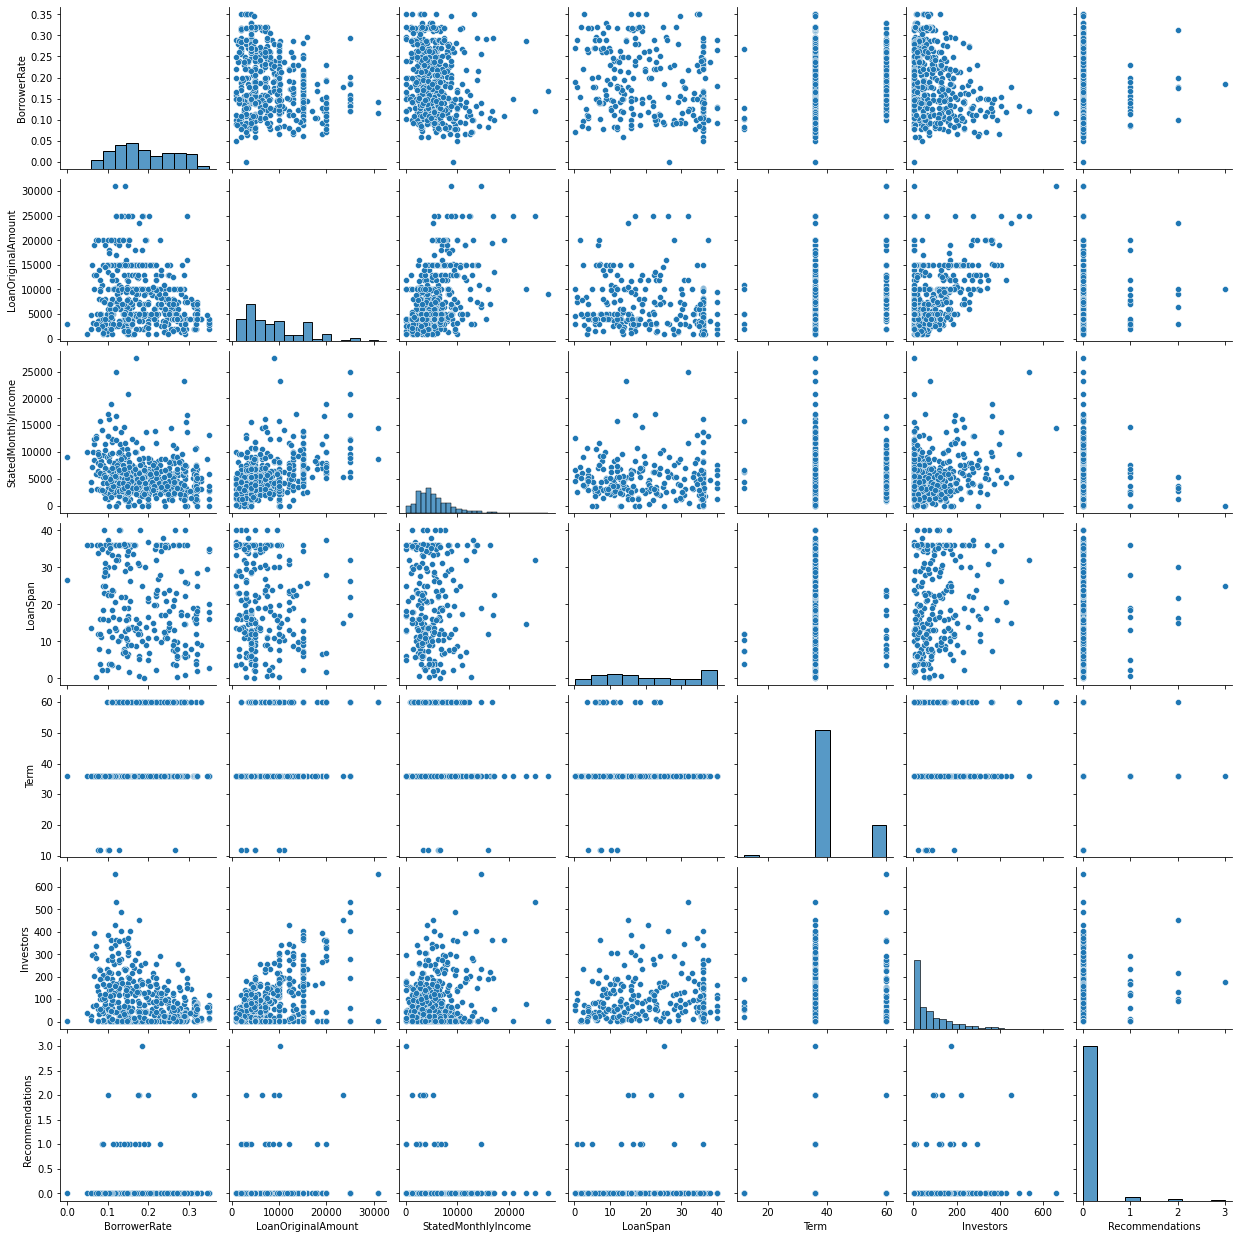

In [52]:
# pairplot of numeric vars to see relationships overview on a sample of data for faster rendering
sample = np.random.choice(df.shape[0], 500, replace = False)
df_samp = df.iloc[sample,:]
sns.pairplot(df_samp, vars = numeric_vars);

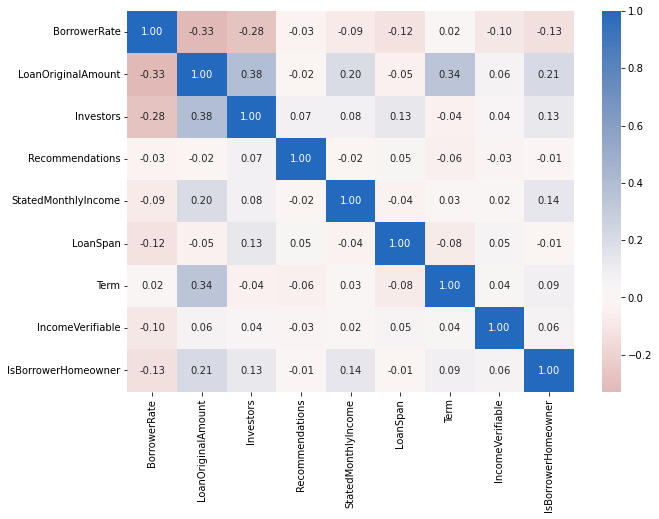

In [53]:
# correlations
plt.figure(figsize = [10, 7])
sns.heatmap(df[['BorrowerRate', 'LoanOriginalAmount', 'Investors', 'Recommendations','StatedMonthlyIncome',
               'LoanSpan', 'Term', 'IncomeVerifiable','IsBorrowerHomeowner']]\
           .corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r', center = 0)
plt.show()

> Out of the variables that i have chosen, it seems like the strongest correlation can be found in :
- Investors - LoanOriginalAmount
- Term - LoanOriginalAmount
- BorrowerRate - LoanOriginalAmount

It seems natural for a huge loan to need many investors to fund it and require long-term to pay it back

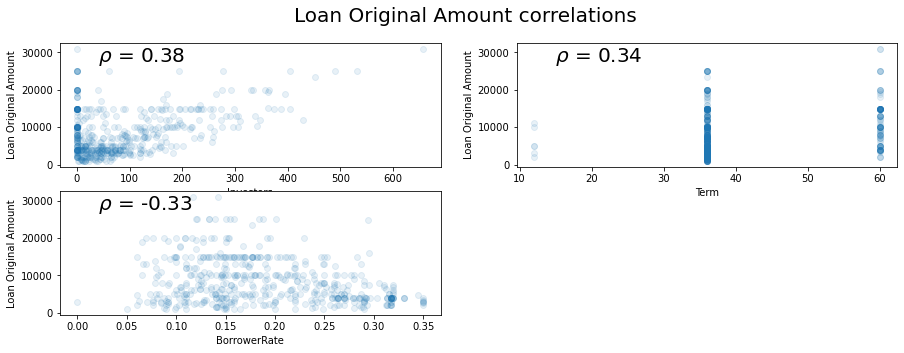

In [54]:
plt.figure(figsize = (15,5))
plt.subplot(2,2,1)
plt.scatter(data = df_samp, x = 'Investors', y = 'LoanOriginalAmount', alpha = 1/10)
plt.ylabel('Loan Original Amount')
plt.xlabel('Investors')
# display the correlation
ax = plt.gca()
coef = df[['Investors', 'LoanOriginalAmount']].corr().iloc[1,0]
label = r'$\rho$ = ' + str(round(coef, 2))
ax.annotate(label, xy = (0.1, 0.85), size = 20, xycoords = ax.transAxes)

plt.subplot(2,2,2)
plt.scatter(data = df_samp, x = 'Term', y = 'LoanOriginalAmount', alpha = 1/10)
plt.xlabel('Term')
plt.ylabel('Loan Original Amount')
# display the correlation
ax = plt.gca()
coef = df[['Term', 'LoanOriginalAmount']].corr().iloc[1,0]
label = r'$\rho$ = ' + str(round(coef, 2))
ax.annotate(label, xy = (0.1, 0.85), size = 20, xycoords = ax.transAxes)

plt.subplot(2,2,3)
plt.scatter(data = df_samp, x = 'BorrowerRate', y = 'LoanOriginalAmount', alpha = 1/10)
plt.xlabel('BorrowerRate')
plt.ylabel('Loan Original Amount')
# display the correlation
ax = plt.gca()
coef = df[['BorrowerRate', 'LoanOriginalAmount']].corr().iloc[1,0]
label = r'$\rho$ = ' + str(round(coef, 2))
ax.annotate(label, xy = (0.1, 0.85), size = 20, xycoords = ax.transAxes)
plt.suptitle('Loan Original Amount correlations', size = 20);

>The correlation with investors seem more clear as the investors increase, while the range of Loan Amount at 1 invest is rather wide.

>Regarding Term, short term loans (12 months) only receive low value while middle term loans has more crowded distribution at lower range of Loan Amount. 

>BorrowerRate has a negative correlation with the original amount, this get more accurate as the amount increase, this can be explained that loans of lower rate can come with lower interest rate as it vary on the borrower's needs regardless of their credit scores, however only people with good credit scores can have high value loans and it usually come with good interest rate

### Categorical variables

<Figure size 1080x720 with 0 Axes>

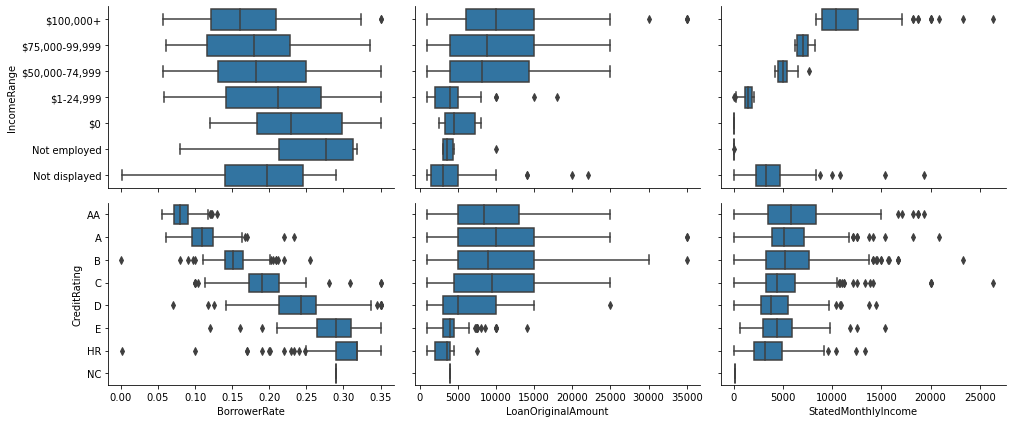

In [55]:
# sample of 2000
samples = np.random.choice(df.shape[0], 1000, replace = False)
df_samp = df.iloc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Function for creating box plots with seaborn's PairGrid. """
    default_color = sns.color_palette()[0]
    sns.boxplot(x, y, color = default_color)

plt.figure(figsize = [15, 10])
g = sns.PairGrid(data = df_samp, x_vars = ['BorrowerRate', 'LoanOriginalAmount','StatedMonthlyIncome'], y_vars = ordered_categoric_vars,
                height = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

- People with higher income range tend to have a lower interest rate on their loans and their loans usually have higher value then people of lower income range 
- The Loan with the better credit rating also benefit from lower interest rate and also come with high value loan. It also have positive correlation with borrower's stated monthly income
> This support the reality that people with higher and more stable income tend to get a low-risk loan with favourable interest rate as they are more likely to pay it back 

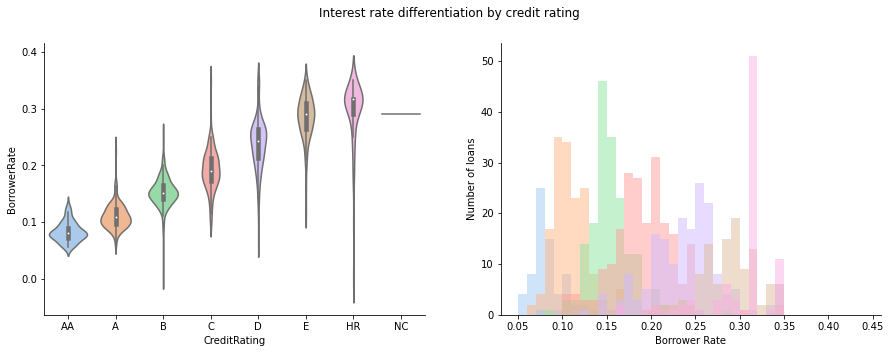

In [56]:
plt.figure(figsize = (15,5))
plt.suptitle('Interest rate differentiation by credit rating')
# violin plot
plt.subplot(1,2,1)
sns.violinplot(data=df_samp, x="CreditRating", y="BorrowerRate", palette = 'pastel')
sns.despine()
# different hist for each credit rating
plt.subplot(1,2,2)
bins = np.arange(0.05, 0.45,0.01)
x=0
for i in credit_rating['Category']:
    plt.hist(df_samp[df_samp['CreditRating']== i]['BorrowerRate'], alpha = 0.5, color = sns.color_palette('pastel')[x], bins = bins)
    x=x+1
sns.despine()
plt.xlabel('Borrower Rate')
plt.ylabel('Number of loans')

plt.show();

> Again, we can see the distribution of interest rate of different rating loans. Higher rating loans come with lower interest rate and vice versa

<Figure size 720x1440 with 0 Axes>

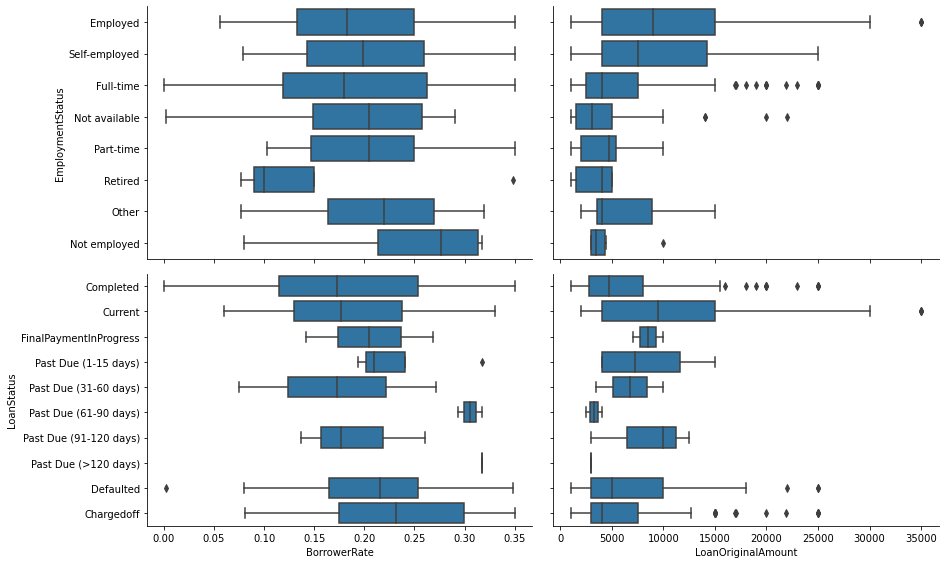

In [57]:
plt.figure(figsize = [10, 20])
g = sns.PairGrid(data = df_samp, x_vars = ['BorrowerRate', 'LoanOriginalAmount'], y_vars = ['EmploymentStatus', 'LoanStatus'],
                height = 4, aspect = 1.5)
g.map(boxgrid)
plt.show();

- Chargedoff and default loans tend to have receive a shorter range and lower value for the original amount. It also associate with with a higher interest rate
- People with a job tend to have a loans with higher value then people who dont

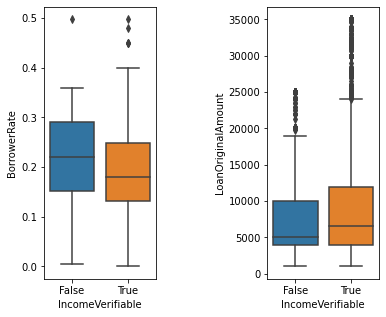

In [58]:
plt.figure(figsize = [6, 5])
plt.subplot(1,2,1)
sns.boxplot(x='IncomeVerifiable', y='BorrowerRate', data=df)
plt.subplot(1,2,2)
sns.boxplot(x='IncomeVerifiable', y='LoanOriginalAmount', data=df)
plt.subplots_adjust(wspace=1)
plt.show();

> People have their income verified earn a better rate and can loan more

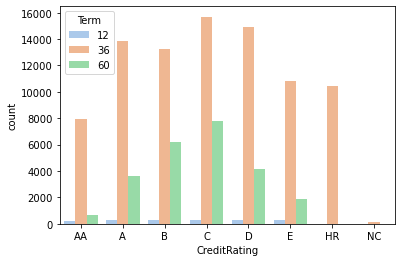

In [59]:
sns.countplot(data = df, x = 'CreditRating', hue = 'Term', palette = 'pastel');

> It seems like the long-term loan also follow a normal distribution in term of risk level and peak at C-rating

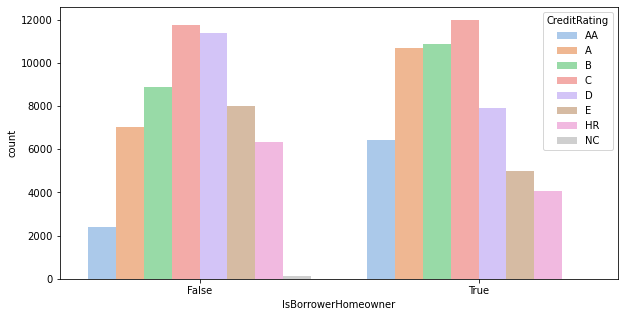

In [60]:
plt.figure(figsize = [10, 5])
sns.countplot(data = df, x = 'IsBorrowerHomeowner', hue = 'CreditRating', palette = 'pastel');

> Homeowner tend to receive a better rating loans

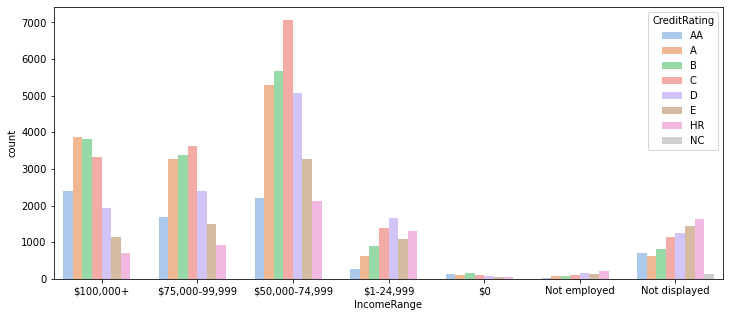

In [61]:
plt.figure(figsize = [12, 5])
sns.countplot(data = df, x = 'IncomeRange', hue = 'CreditRating', palette = 'pastel');

> The rating of the loans tend to associate with the income range too, as low income and not displayed group's loans have higher risk

In [62]:
#Fore LoanType, i'll exclude the current loan to see how the default rate varies betweent variable
#Create an extra dataset for this
df1=df[df['LoanType'] != 'Current']
#Recreate the ordinal order
Loan_Type_df1 = {'Category': ['Completed','Past Due','Fault']}
df1.LoanType = df1['LoanType'].astype(pd.api.types.CategoricalDtype(ordered=True, categories = Loan_Type_df1['Category']))


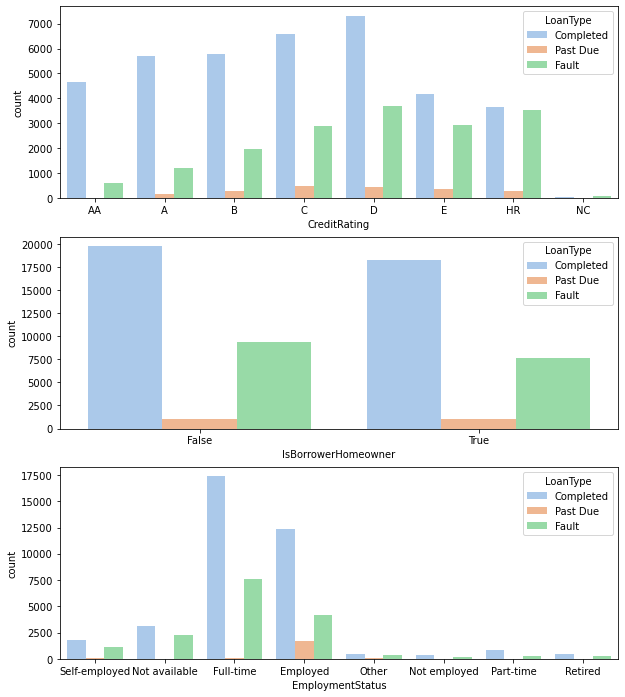

In [63]:
plt.figure(figsize = [10,12])
plt.subplot(3,1,1)
sns.countplot(data = df1, x = 'CreditRating', hue = 'LoanType', palette = 'pastel');
plt.subplot(3,1,2)
sns.countplot(data = df1, x = 'IsBorrowerHomeowner', hue = 'LoanType', palette = 'pastel');
plt.subplot(3,1,3)
sns.countplot(data = df1, x = 'EmploymentStatus', hue = 'LoanType', palette = 'pastel');

<Figure size 720x1080 with 0 Axes>

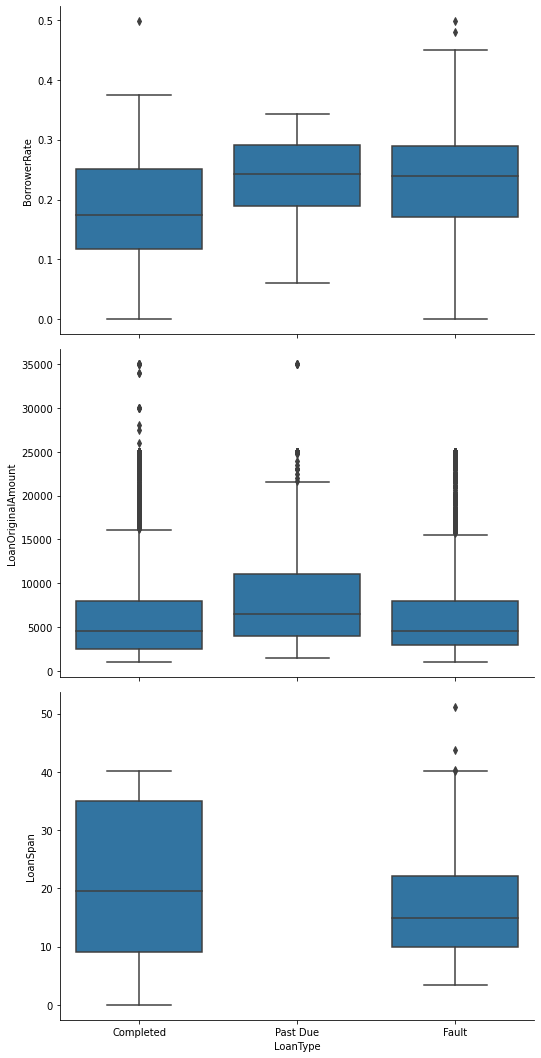

In [64]:
plt.figure(figsize = [10, 15])
g = sns.PairGrid(data = df1, y_vars = ['BorrowerRate', 'LoanOriginalAmount','LoanSpan'], x_vars = 'LoanType',
                height = 5, aspect = 1.5)
g.map(boxgrid)
plt.xticks(rotation = 0)
plt.show();

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
The interest rate on the loan is negative correlate to the loan amount, the loan rating, the income of borrower. Combine with other observations, it support the idea that the better state of a person (income, house ownership, occupation), their loan are less riskier and they receive more favourable interest rate

The fault (include defaulted and chargeoff loan) and the past due loan maxed out at D-rating Loan. However it might be relate to the amount of loan at this categories. Look at the rate of fault/past due loan divide by the total loan of the categories, the worse the rating then the higher the default rate. It provide that the rating system is accurate

The interest rate on fault and past due loans are higher than the completed ones. The ratio between fault over completed loan is negatively correlated with the occupation of borrower (the better state they are at, the less likely the loan will have issues)

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- People with their income verified tend to loan more and receive better interest
- Higher loan amounts are borrowed for longer term.
- Higher loan amounts is positive correlated with credit risk
- While the fault loan doesn't stand out interm of loan amount compare to the completed ones, the past due loan have a higher average loan amount than normal
- The employed borrowers have the highest past-due rate
- The fault loans has a span focus on 10-20 months

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.
### LoanType , LoanOriginalAmount, CreditRating, BorrowerRate

I want to focus on exploring relationship relate to the aboves variable as it helps explains the fault cases of loans

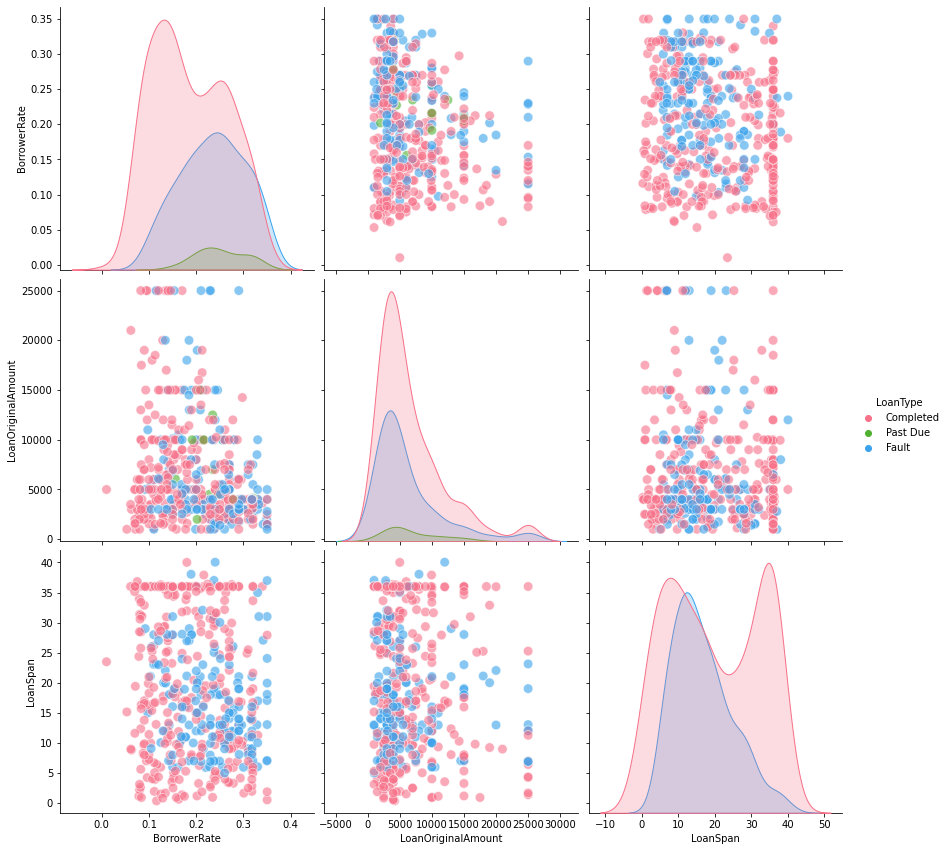

In [65]:
# Create sample to better observe the scatter plot
sample_loantype = np.random.choice(df1.shape[0], 500, replace = False)
loantype_modified = df1.iloc[sample_loantype ,:]

# Pair plot colored by Loan Type
sns.pairplot(loantype_modified, 
             vars = ['BorrowerRate', 'LoanOriginalAmount','LoanSpan',], 
             hue = 'LoanType', diag_kind = 'kde', palette = 'husl',
             plot_kws = {'alpha': 0.6, 's': 90},
             height = 4);

> Its much clearer that fault loan is associated with higher interest rate, lower loan amount while Loan Span for completed one experience a spike in higher value, this might reflect that many loans experience huge effort to complete in a long period of time

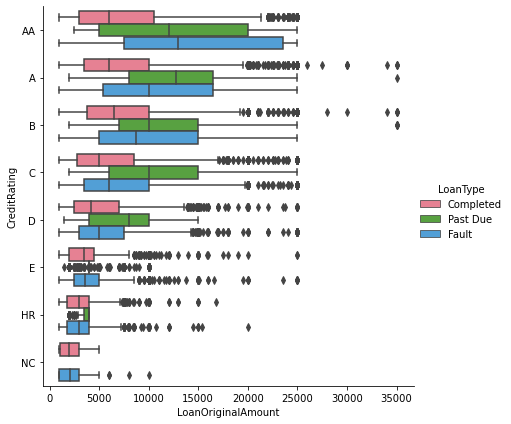

In [66]:
sns.catplot(y = 'CreditRating', x = 'LoanOriginalAmount', hue = 'LoanType', kind = 'box', 
            data = df1, height = 6, palette = 'husl');

> Among all the loan rating, it seems like fault loan and Past due loan tend to have higher original amount then completed ones.
> Fault Loan in AA categories only have a small but increrible high value in LoanAmount. This might support the assumption that these borrower of those "safe loan" struggle with their business or met something unexpected and coulnd't repaid that much of money

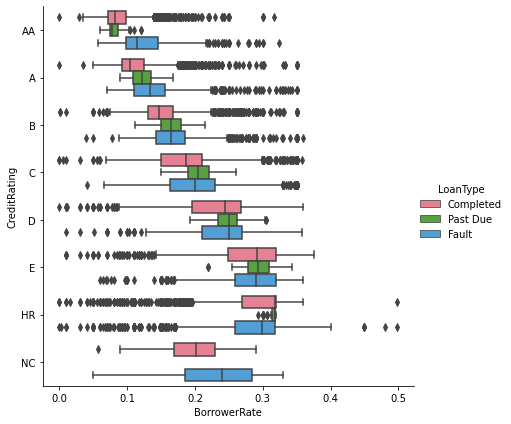

In [67]:
sns.catplot(y = 'CreditRating', x = 'BorrowerRate', hue = 'LoanType', kind = 'box', 
            data = df1, height = 6, palette = 'husl');


> Across "safe loan" rating like AA, A, Fault Loan and PastDue are strongly associated with higher interest rate


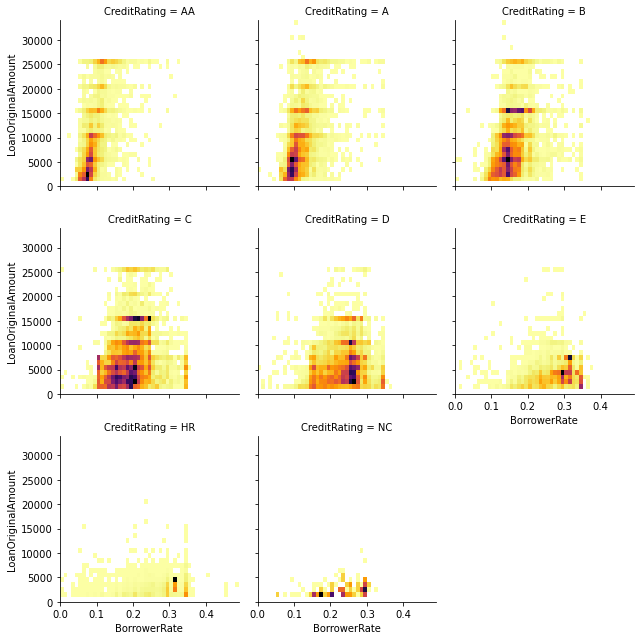

In [68]:
def hist2dgrid(x, y, **kwargs):
    palette = kwargs.pop('color')
    bins_x = np.arange(0, 0.5, 0.01)
    bins_y = np.arange(0, 35000, 1000)
    plt.hist2d(x, y,bins = [bins_x, bins_y],  cmap = palette, cmin = 0.5)
    
# create faceted heat maps for Fault loans
g = sns.FacetGrid(data = df1, col = 'CreditRating', col_wrap = 3, height = 3,)
g.map(hist2dgrid, 'BorrowerRate', 'LoanOriginalAmount', color = 'inferno_r')
plt.show()

> The correlations between Loan Amount and interest Rate isn't too strong to observe the pattern. However we esier spot the different among loan rating, At a same level of loan Amount ( 25000 for example), higher loan rating is associated with lowervalue. 

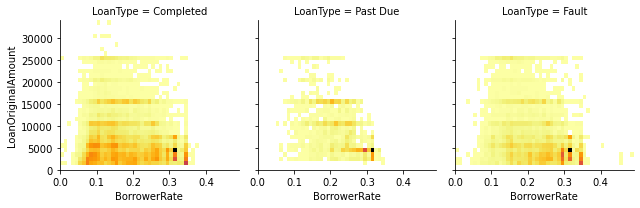

In [69]:
g = sns.FacetGrid(data = df1, col = 'LoanType', col_wrap = 3, height = 3,)
g.map(hist2dgrid, 'BorrowerRate', 'LoanOriginalAmount', color = 'inferno_r')
plt.show()

> Againt, the heat map support that fault and past due loan is highly associated high interest rate. However, for Past Due Loan, it is more attached to low Loan amount compare to Fault loan

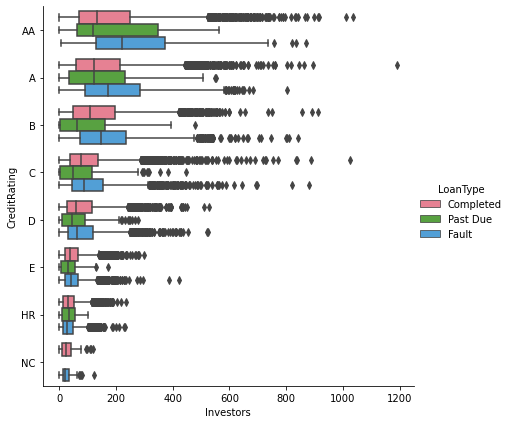

In [70]:
sns.catplot(y = 'CreditRating', x = 'Investors', hue = 'LoanType', kind = 'box', 
            data = df1, height = 6, palette = 'husl');

> As predicted, better rating Loan also have more investors , however, Fault loans seems to have more investors than normal regardless of the rating

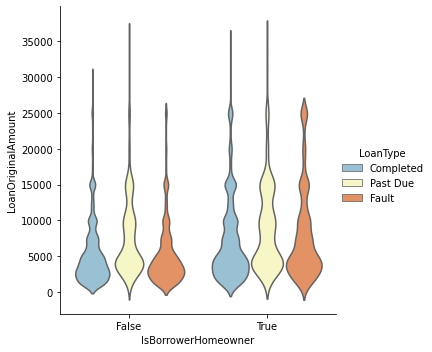

In [71]:
sns.catplot(x="IsBorrowerHomeowner", y="LoanOriginalAmount", hue="LoanType",
            kind="violin", inner=None,
            palette="RdYlBu_r", data=df1);

> Slightly differents can be spot out in the Fault and completed group between the home owners and those who dont

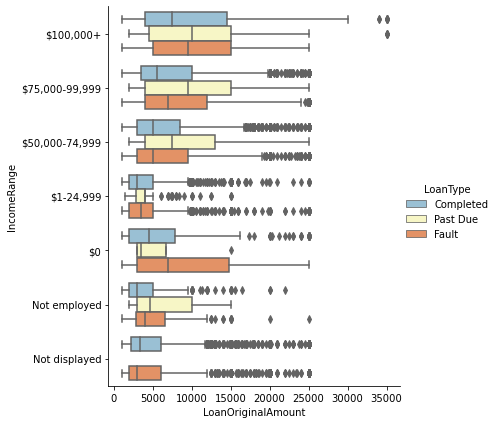

In [72]:
sns.catplot(y = 'IncomeRange', x = 'LoanOriginalAmount', hue = 'LoanType', kind = 'box', data = df1, height = 6, \
           palette = 'RdYlBu_r');

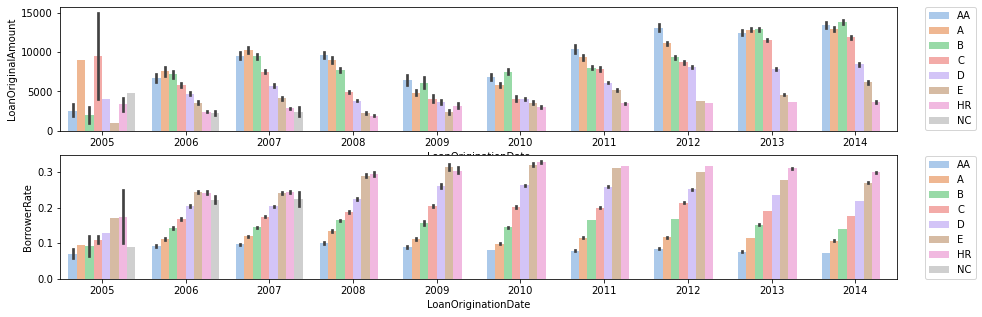

In [73]:
plt.figure(figsize=(15,5))
#Ploting distribution of different credit rating across years
plt.subplot(2,1,1)
sns.barplot(data = df, x = df['LoanOriginationDate'].dt.year, y = 'LoanOriginalAmount', hue = 'CreditRating', palette = 'pastel')
plt.legend(loc = 'right', bbox_to_anchor=(1.1, 0.5), ncol=1);
plt.subplot(2,1,2)
sns.barplot(data = df, x = df['LoanOriginationDate'].dt.year, y = 'BorrowerRate', hue = 'CreditRating', palette = 'pastel')
plt.legend(loc = 'right', bbox_to_anchor=(1.1, 0.5), ncol=1);

> The overall Loan Amount seems to increase overtime, this might be due to inflation

> The plot strongly support the association between loan rating and Loan Amount as well as loan rating and Borrowed Rate over the years 

> The gap between the amount in high risk loan and low risk loan seems to be tighten in the years that has economic hardship (2009, 2010) While there isn't much change in the interest rate

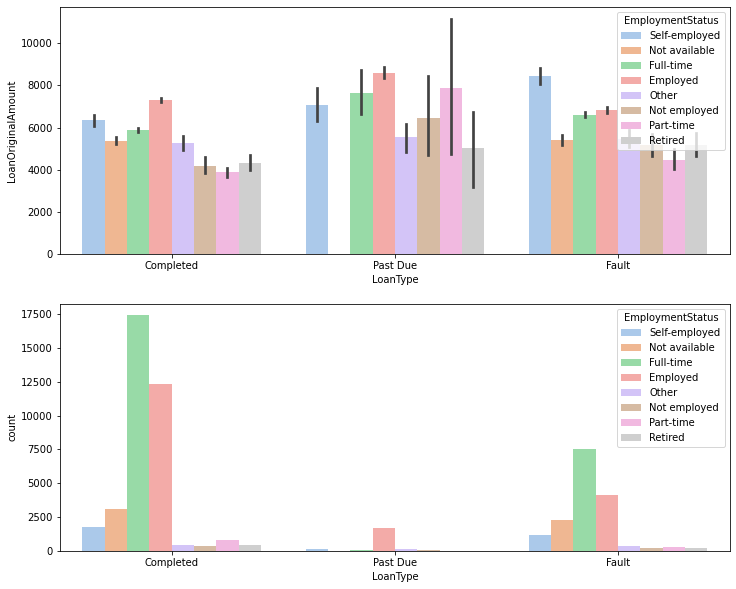

In [74]:
plt.figure(figsize = [12, 10])
plt.subplot(2,1,1)
sns.barplot(data = df1, x = 'LoanType' ,y ='LoanOriginalAmount', hue = 'EmploymentStatus', palette = 'pastel');
plt.subplot(2,1,2)
sns.countplot(data = df1, x = 'LoanType' , hue = 'EmploymentStatus', palette = 'pastel');

> Interestingly, Fault Loan seems to associate with higher Loan Amount among Self-employed group. And the rate of Fault loan for Self-Employed and not available is also higher than normal.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> As expected, the credit rating system is highly accurate to detect fault loans. Through the dataset, this is supported when combine with borrower status include income, employement status, house ownership. These people of upper class is more likely to have Loan with lower interests and Higher loan amount.

>Also, better rating loans are more likely to associated with high amount and low interest rate. There isn't any different in fault rate across rating, they are all associated with high interest rate. The amount is excluded when considering since only high rating loans are more likely to have high amount

### Were there any interesting or surprising interactions between features?
- The gap between the Loan amount in high risk loan and low risk loan seems to be tighten in the years that has economic hardship (2009, 2010) While there isn't much change in the interest rate
- Past due Loan have a lower Loan amount compare to completed and fault loan
- Fault Loan seems to associate with higher Loan Amount among Self-employed group
- Fault loans seems to have more investors than normal regardless of the rating